In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visualization
sns.set(style='whitegrid')
%matplotlib inline


In [11]:
# Load the dataset
df = pd.read_csv('task2.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Allen, Mr. William",male,35.0,0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [12]:
# Data structure and summary
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10 non-null     int64  
 1   Survived     10 non-null     int64  
 2   Pclass       10 non-null     int64  
 3   Name         10 non-null     object 
 4   Sex          10 non-null     object 
 5   Age          9 non-null      float64
 6   SibSp        10 non-null     int64  
 7   Parch        10 non-null     int64  
 8   Ticket       10 non-null     object 
 9   Fare         10 non-null     float64
 10  Cabin        4 non-null      object 
 11  Embarked     10 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,10.00000,10.000000,10.000000,10,10,9.000000,10.000000,10.000000,10,10.000000,4,10
unique,NaN,NaN,NaN,10,2,NaN,NaN,NaN,10,NaN,4,3
top,NaN,NaN,NaN,"Allen, Mr. William",female,NaN,NaN,NaN,A/5 21171,NaN,C85,S
freq,NaN,NaN,NaN,1,6,NaN,NaN,NaN,1,NaN,1,7
mean,5.50000,0.600000,2.200000,NaN,NaN,32.111111,0.600000,0.300000,NaN,28.870820,NaN,NaN
std,3.02765,0.516398,0.918937,NaN,NaN,17.673741,0.966092,0.674949,NaN,22.655801,NaN,NaN
min,1.00000,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,NaN,7.250000,NaN,NaN
25%,3.25000,0.000000,1.250000,NaN,NaN,26.000000,0.000000,0.000000,NaN,9.127050,NaN,NaN
50%,5.50000,1.000000,2.500000,NaN,NaN,35.000000,0.000000,0.000000,NaN,23.812500,NaN,NaN
75%,7.75000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,46.414575,NaN,NaN


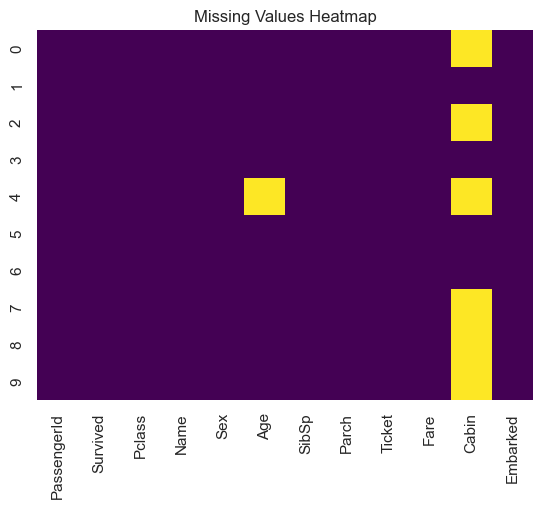

In [13]:
# Check and visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [14]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop any remaining missing values
df.dropna(inplace=True)


C:\Users\PIE\AppData\Local\Temp\ipykernel_4100\1325372075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\PIE\AppData\Local\Temp\ipykernel_4100\1325372075.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [15]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Allen, Mr. William",0,35.0,0,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Moran, Mr. James",0,35.0,0,0,330877,8.4583,True,False


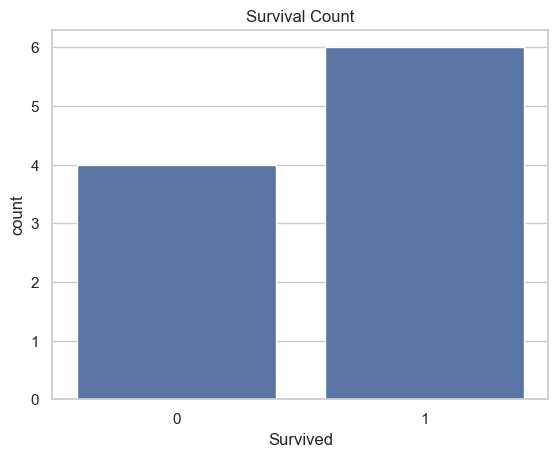

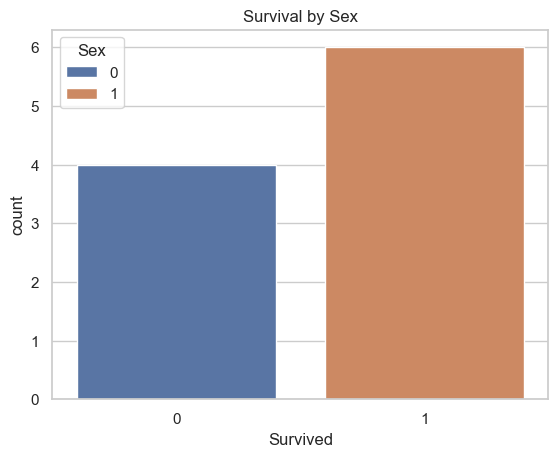

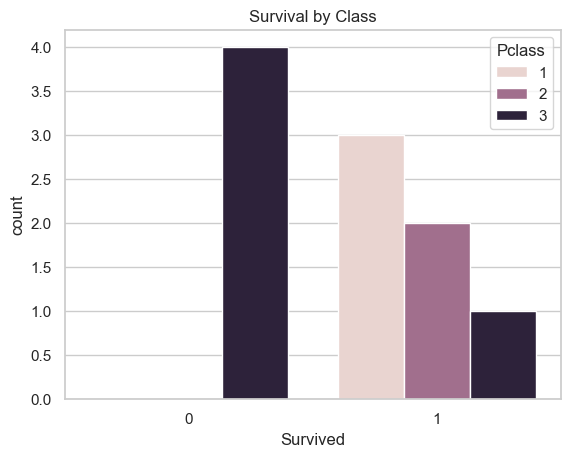

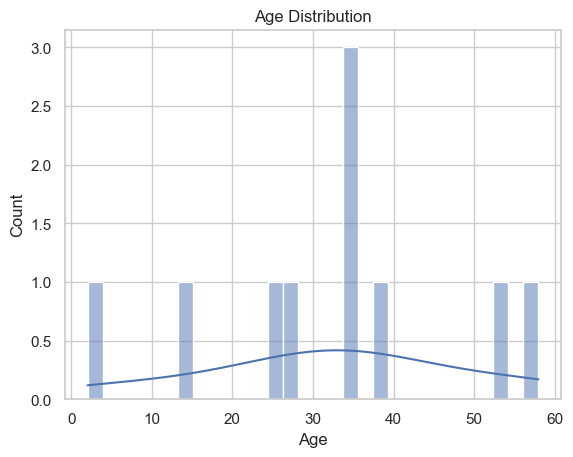

In [16]:
# Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.show()

# Age Distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


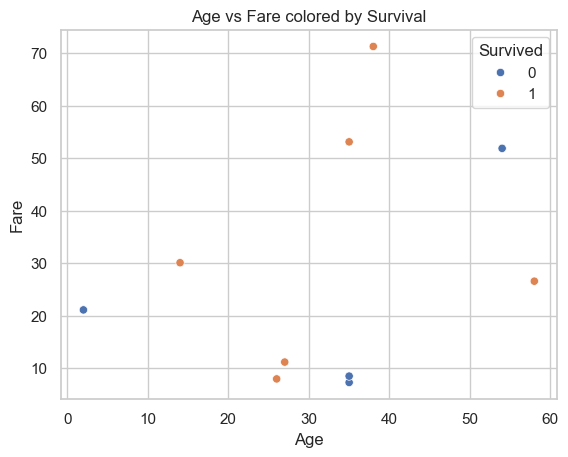

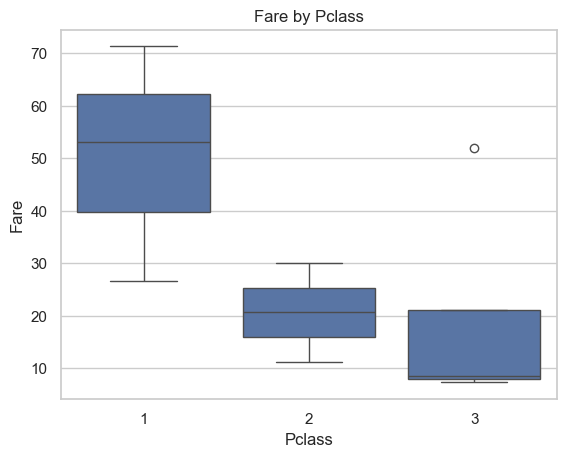

In [19]:
# Age vs Fare colored by Survival
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare colored by Survival')
plt.show()

# Boxplot of Fare by Pclass
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare by Pclass')
plt.show()
